# Определение перспективного тарифа для телеком компании

Задача: 
Определить, какой тариф приносит больше денег. Сделать предварительный анализ тарифов на небольшой выборке клиентов. Проанализировать поведение клиентов. Предложить оптимальный набор услуг 

Даннные от 500 пользователей за 2018 год: 

- Таблица users (информация о пользователях)
- Таблица calls (информация о звонках)
- Таблица messages (информация о сообщениях)
- Таблица internet (информация об интернет-сессиях)
- Таблица tariffs (информация о тарифах)

## 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
from math import *

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')
display(data_calls.head())
data_calls.info()
data_calls.describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [3]:
data_internet = pd.read_csv('/datasets/internet.csv')
display(data_internet.head())
data_internet.info()
data_internet.describe()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [4]:
data_messages = pd.read_csv('/datasets/messages.csv')
display(data_messages.head())
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
data_users = pd.read_csv('/datasets/users.csv')
display(data_users.head())
data_users.info()
data_users.describe()
print( 'Ушли с тарифа "Смарт" за год', len(data_users.query('churn_date.isna() != True and tariff == "smart"')), len(data_users.query('churn_date.isna() != True and tariff == "smart"'))/351)
print( 'Ушли с тарифа "Ультра" за год',len(data_users.query('churn_date.isna() != True and tariff == "ultra"')), len(data_users.query('churn_date.isna() != True and tariff == "ultra"'))/149)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Ушли с тарифа "Смарт" за год 23 0.06552706552706553
Ушли с тарифа "Ультра" за год 15 0.10067114093959731


### Выводы

В данных нет пропусков. Предоставленны данные по 500 клиентам, что соответствует заявленной выборке. 38 человек прекратили использовать данные тарифы до конца 2018 года. Данные только о совершеннолетних пользователях.

При знакомстве с данными выявлены следующие проблемы:
- все колонки с датами содержат данные формата 'object', что затрудняет работу с ними;
- графа с данными о звонках содержит 0: что это за звонки? только неотвеченные, или здесь же звонки за счет абонента?
- длительность звонков указана как float, но учитываются только целые минуты. Эти значения должны быть округлены в большую сторону. 
- в графе churn_date значатся пропуски, которые проще заменить условной датой, которая заведомо больше исследуемого промежутка времени. 

## 2. Подготовка данных

In [7]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['month'] = data_calls['call_date'].values.astype('datetime64[M]')
data_calls['duration'] = data_calls['duration'].agg(ceil)
data_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,2018-12-01
202603,1499_216,2018-10-18,19,1499,2018-10-01
202604,1499_217,2018-11-10,11,1499,2018-11-01
202605,1499_218,2018-10-06,5,1499,2018-10-01


In [10]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].values.astype('datetime64[M]')
data_calls['duration'] = data_calls['duration'].replace(0, 1)

In [11]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].values.astype('datetime64[M]')

In [12]:
data_users['churn_date'] = data_users['churn_date'].fillna('2019-12-31')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

In [13]:
data_calls['duration'] = data_calls['duration'].replace(0, 1) 
data_calls['duration'].sum()

1489914

In [14]:
data_calls_grouped = data_calls.pivot_table(index = ['month', 'user_id'], values = 'duration', aggfunc = ['sum', 'count']).reset_index()
data_calls_grouped.columns = ['month', 'user_id', 'calls_duration_sum', 'calls_count']
data_calls_grouped.sort_values(by = 'calls_duration_sum')

,month,user_id,calls_duration_sum,calls_count
355,2018-04-01,1373,1,1
1003,2018-07-01,1257,1,1
1661,2018-09-01,1257,1,1
818,2018-06-01,1424,1,1
1516,2018-09-01,1053,2,2
...,...,...,...,...
2158,2018-10-01,1377,1431,178
712,2018-06-01,1196,1437,176
2909,2018-12-01,1216,1471,198
204,2018-03-01,1377,1647,203


In [15]:
data_messages_grouped = data_messages.pivot_table(index = ['month', 'user_id'], values = 'message_date', aggfunc = 'count').reset_index()
data_messages_grouped.columns = ['month', 'user_id', 'message_count']
data_messages_grouped

,month,user_id,message_count
0,2018-01-01,1005,7
1,2018-01-01,1032,38
2,2018-01-01,1045,5
3,2018-01-01,1055,30
4,2018-01-01,1071,16
...,...,...,...
2712,2018-12-01,1493,78
2713,2018-12-01,1495,84
2714,2018-12-01,1496,51
2715,2018-12-01,1497,17


In [16]:
data_internet_grouped = data_internet.pivot_table(index = ['month', 'user_id'], values = 'mb_used', aggfunc = 'sum').reset_index()

In [17]:
month = data_calls.groupby('month')['duration'].min().reset_index()
month['key'] = 1

data_users['key'] = 1
report = month.merge(data_users, on = 'key').drop(['duration', 'key'], axis = 1)

In [18]:
report.head()

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,2018-01-01,1000,52,2019-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,2018-01-01,1001,41,2019-12-31,Москва,Иван,Ежов,2018-11-01,smart
2,2018-01-01,1002,59,2019-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,2018-01-01,1003,23,2019-12-31,Москва,Белла,Белякова,2018-08-17,ultra
4,2018-01-01,1004,68,2019-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [19]:
report.sort_values(by = 'user_id')

,month,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,2018-01-01,1000,52,2019-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,2018-03-01,1000,52,2019-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5500,2018-12-01,1000,52,2019-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1500,2018-04-01,1000,52,2019-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
500,2018-02-01,1000,52,2019-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...
1499,2018-03-01,1499,35,2019-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart
999,2018-02-01,1499,35,2019-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart
499,2018-01-01,1499,35,2019-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart
5499,2018-11-01,1499,35,2019-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart


In [20]:
report = report.merge(data_calls_grouped, how = 'left', on = ['month', 'user_id'])

In [21]:
report['calls_duration_sum'].sum()

1489914.0

In [22]:
report = report.merge(data_messages_grouped, how = 'left', on = ['month', 'user_id'])

In [23]:
report = report.merge(data_internet_grouped, how = 'left', on = ['month', 'user_id'])
report.columns

Index(['month', 'user_id', 'age', 'churn_date', 'city', 'first_name',
       'last_name', 'reg_date', 'tariff', 'calls_duration_sum', 'calls_count',
       'message_count', 'mb_used'],
      dtype='object')

In [24]:
report.columns = ['month', 'user_id', 'age', 'churn_date', 'city', 'first_name','last_name', 'reg_date', 'tariff_name', 'calls_duration_sum', 'calls_count', 'message_count', 'mb_used']

In [25]:
report['user_id'].value_counts()

1499    12
1181    12
1129    12
1133    12
1137    12
        ..
1354    12
1358    12
1362    12
1366    12
1000    12
Name: user_id, Length: 500, dtype: int64

In [26]:
report = report.merge(data_tariffs, on = 'tariff_name', how = 'left')

In [27]:
report['mb_used'] = report['mb_used']/ 1024
report['mb_per_month_included'] = report['mb_per_month_included'] / 1024
report.columns = ['month', 'user_id', 'age', 'churn_date', 'city', 'first_name',
       'last_name', 'reg_date', 'tariff_name', 'calls_duration_sum',
       'calls_count', 'message_count', 'gb_used', 'messages_included',
       'gb_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute']

In [28]:
report['calls_duration_sum'] = report['calls_duration_sum'].fillna(0)
report['message_count'] = report['message_count'].fillna(0)
report['gb_used'] = report['gb_used'].fillna(0)

In [29]:
def money_per_month(row):
    duration_more = row['calls_duration_sum'] -row['minutes_included']
    if duration_more > 0 :
        duration_sum = duration_more * row['rub_per_minute']
    else:
        duration_sum = duration_more * 0
            
    message_more = row['message_count'] - row['messages_included']
    if message_more > 0:
        message_sum = message_more * row['rub_per_message']
    else:
        message_sum = message_more * 0
           
    gb_more = row['gb_used'] - row['gb_per_month_included']
    if gb_more > 0:
        gb_sum = ceil(gb_more) * row['rub_per_gb']
    else:
        gb_sum = gb_more * 0
            
    summa = row['rub_monthly_fee'] + duration_sum + message_sum + gb_sum
    return summa
    
report['summa'] = report.agg(money_per_month, axis = 1)
report['summa'].sum()

7608790.0

In [30]:
report = report.loc[report['month'] >= report['reg_date'].values.astype('datetime64[M]')]
report = report.loc[report['month'] <= report['churn_date'].values.astype('datetime64[M]')]

### Выводы
 Среди 500 предложенных для исследования клиентов - часть не являются пользователями исследуемых тарифов на всем промежутке отчетного периода. Данные об этих клиентах содержат информацию до перехода на тариф (отчетные месяца раньше, чем месяц перехода на тариф в графе reg_date,  либо позже, чем клиент прекратил использовать тариф - отчетные месяца больше, чем значение в графе churn_date). 
Строки, неудовлетворяющие временным условиям удалены из отчета.

 Данные приведены к следующим типам:
 - все даты приведены к типу datetime64
 - пропуски в графе churn_date заменены условной датой '2019-12-31', выходящий за границу исследуемого периода,
 - длительность звонков (в таблице учета каждого звонка) округлена до минут (в большую сторону, методом ceil())
 - использованный трафик, лимит трафика переведены из мегабайт в гигобайты. При вычислении оплаты трафика сверх положенного по тарифу осуществлялась так же при округлении дополнительного трафика до гигабайта (в большую сторону, методом ceil())
 - нулевые значения длительности звонков и использованных мегабайт заменены на 1, в соответствии с политикой компании "Мегалайн" 

 Для клиентов посчитаны следующие параметры по месяцам:
 - количество минут, потраченных на звонки  (с учетом округления вверх, как указано в требованиях по тарифам)
 - количество звонков, совершенного за месяц
 - количество смс, отправленных абонентом
 - количество гигобайт, использованных за месяц
 - количество денег, которые заплатил клиент, учитывая требования тарифа, закрепленного за клиентом.
 
Среди всех звонков выделены звонки длительностью 0 минут. Такие звонки есть почти у всех клиентов (492 из 500). Но средняя доля таких звонков по отношению к совершенным звонкам - 24%. Только один обонент имеет 50% пропущенных звонков (звонки с длительностью 0) - всего 14 звонков совершено этим абонентом. 
Все предоставленные данные сведены в общую таблицу, сгруппированную по месяцам и клиентам ('user_id').

## Шаг 3: Анализ данных

In [31]:
report_ultra = report.query('tariff_name == "ultra"')
report_smart = report.query('tariff_name == "smart"')

#### Тариф "Ультра"

In [32]:
report_ultra_grouped = report_ultra.pivot_table(index='month', values = ['calls_duration_sum', 'calls_count', 'message_count', 'gb_used', 'summa'], aggfunc= 'mean')
display(report_ultra_grouped)
len(report_ultra['user_id'].unique())

,calls_count,calls_duration_sum,gb_used,message_count,summa
month,,,,,
2018-01-01,59.444444,440.888889,12.832696,33.777778,1950.000000
2018-02-01,41.541667,304.666667,11.499939,21.958333,1975.000000
2018-03-01,67.675676,503.081081,17.124561,32.297297,2014.864865
2018-04-01,66.509434,470.072727,16.433725,31.563636,2001.818182
2018-05-01,75.906250,524.865672,18.909329,37.850746,2059.701493
2018-06-01,69.209877,492.428571,18.481386,41.726190,2039.285714
2018-07-01,78.363636,560.296703,20.015298,49.846154,2118.131868
2018-08-01,74.058252,524.570093,19.117241,48.439252,2083.177570
2018-09-01,77.288288,553.643478,18.754177,52.286957,2024.347826


149

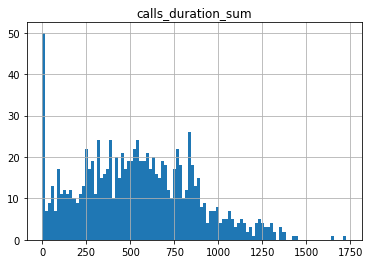

Среднее значение calls_duration_sum 508.993974322146
Дисперсия значение calls_duration_sum 5731.10507373408
Стандартное отклонение значение calls_duration_sum 75.70406246519457


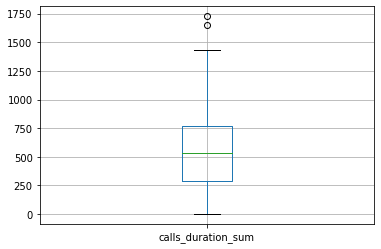

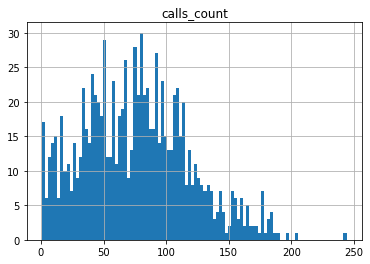

Среднее значение calls_count 71.25887063587648
Дисперсия значение calls_count 128.55663700914195
Стандартное отклонение значение calls_count 11.33828192492769


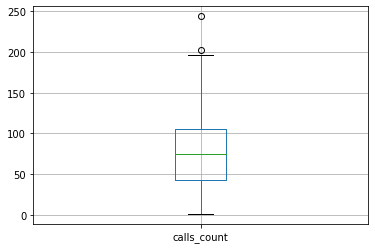

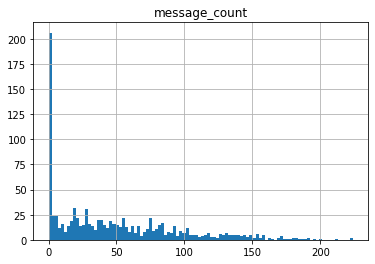

Среднее значение message_count 43.67890456123896
Дисперсия значение message_count 137.93961140938538
Стандартное отклонение значение message_count 11.744769534111148


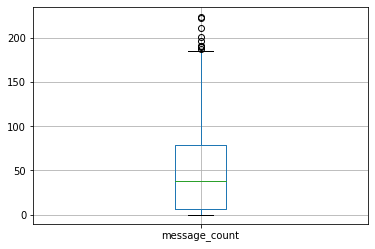

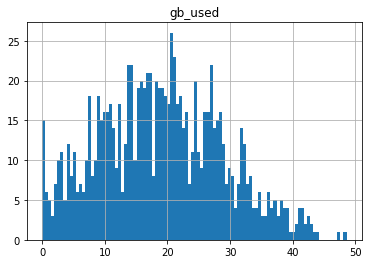

Среднее значение gb_used 17.7664428169891
Дисперсия значение gb_used 7.7071601261619245
Стандартное отклонение значение gb_used 2.77617725049427


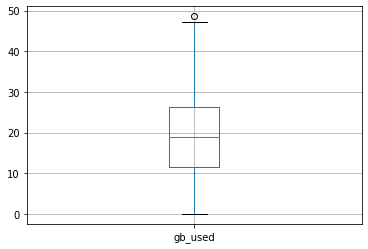

In [33]:
list_qualities = ['calls_duration_sum', 'calls_count', 'message_count', 'gb_used']

for column in list_qualities:
    report_ultra.hist(column, bins = 100)
    plt.show()
    print('Среднее значение', column, report_ultra_grouped[column].mean())
    print('Дисперсия значение', column, np.var(report_ultra_grouped[column]))
    print('Стандартное отклонение значение', column, np.std(report_ultra_grouped[column]))
    report_ultra.boxplot(column) 
    plt.show()

#### Тариф 'Смарт'

In [34]:
report_smart_grouped = report_smart.pivot_table(index='month', values = ['calls_duration_sum', 'calls_count', 'message_count', 'gb_used', 'summa'], aggfunc= 'mean')
display(report_smart_grouped)
len(report_smart['user_id'].unique())

,calls_count,calls_duration_sum,gb_used,message_count,summa
month,,,,,
2018-01-01,27.676471,209.647059,8.314177,18.235294,723.352941
2018-02-01,40.189655,306.310345,11.325248,24.086207,835.051724
2018-03-01,54.324675,400.532468,14.750155,31.857143,1178.571429
2018-04-01,51.312500,377.000000,13.146661,30.741071,974.875000
2018-05-01,55.241135,398.404255,15.434750,33.773050,1210.595745
2018-06-01,55.889571,406.701220,15.424461,33.402439,1218.048780
2018-07-01,56.726368,419.288557,15.374170,33.751244,1240.502488
2018-08-01,59.230769,433.191489,16.221406,33.638298,1337.612766
2018-09-01,59.776062,440.080769,15.921464,33.638462,1267.576923


351

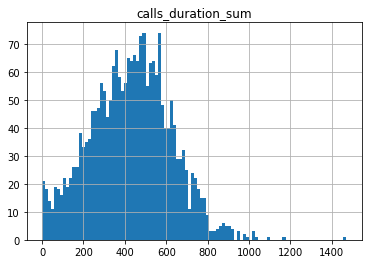

Среднее значение calls_duration_sum 397.25306919955443
Дисперсия значение calls_duration_sum 5033.854207603631
Стандартное отклонение значение calls_duration_sum 70.94965967221852


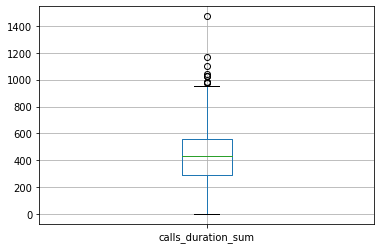

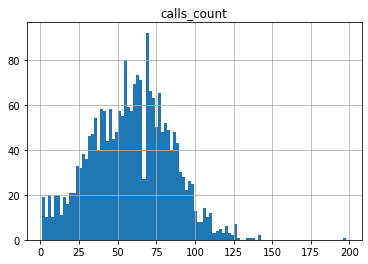

Среднее значение calls_count 54.076448129841395
Дисперсия значение calls_count 101.86475596124963
Стандартное отклонение значение calls_count 10.092807139802565


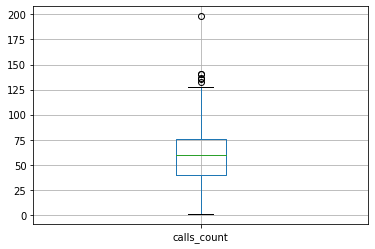

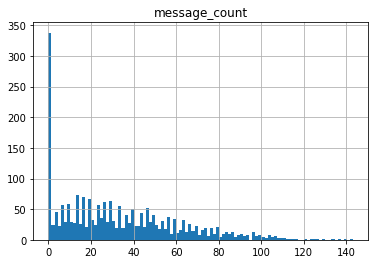

Среднее значение message_count 31.404336384635375
Дисперсия значение message_count 23.79398757463942
Стандартное отклонение значение message_count 4.877908114616287


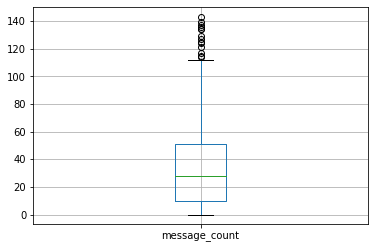

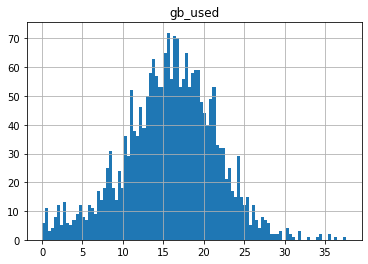

Среднее значение gb_used 14.701113614624282
Дисперсия значение gb_used 6.211892818927102
Стандартное отклонение значение gb_used 2.49236691097581


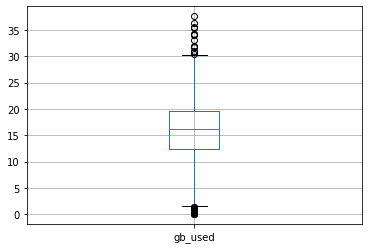

In [35]:
for column in list_qualities:
    report_smart.hist(column, bins = 100)
    plt.show()
    print('Среднее значение', column, report_smart_grouped[column].mean())
    print('Дисперсия значение', column, np.var(report_smart_grouped[column]))
    print('Стандартное отклонение значение', column, np.std(report_smart_grouped[column]))
    report_smart.boxplot(column)
    plt.show()

In [36]:
report_ultra['gb_used'].describe()

count    986.000000
mean      18.993223
std        9.864351
min        0.000000
25%       11.473228
50%       18.851582
75%       26.206919
max       48.579775
Name: gb_used, dtype: float64

In [37]:
print('Количесвто клиентов, которым выгоднее уйти с тарифа Ультра на Смарт (без доплаты за трафик и звонки)', len(report_ultra.query('gb_used <= 15 and calls_duration_sum <= 500')['user_id'].unique()))
print('Количесвто клиентов, которым выгоднее уйти с тарифа Ультра на Смарт (c доплатой за трафик до 19 гб и минуты до 700)', len(report_ultra.query('gb_used <= 19 and calls_duration_sum <= 700')['user_id'].unique()))

Количесвто клиентов, которым выгоднее уйти с тарифа Ультра на Смарт (без доплаты за трафик и звонки) 105
Количесвто клиентов, которым выгоднее уйти с тарифа Ультра на Смарт (c доплатой за трафик до 19 гб и минуты до 700) 119


### Выводы
Между двумя тарифами клиенты распределены не равномерно - большая часть выборки относится к тарифу "Смарт" (351 из 500 клиентов). Распределение величин по параметрам длительность звонков за месяц, количество звонков, количество использованного трафика для каждого клиента за каждый месяц похоже на нормальное с длиными хвостами вправо, поскольку отрицательные значения не возможны. Так же для всех исследуемых критериев есть выбросы в 0 - кто-то вообще не пользуется звонками, кто-то сообщениями - предпочитая тратить интернет -трафик взамен. При этом значения использованного трафика около 0 можно считать выбросами - таких клиентов очень мало среди пользователей тарифа "Смарт".  

Клиенты тарифа "Ультра" делают в среднем за месяц:
- совершают 71 звонок (стандартное отклонение (std) = 11.34), если исключить звонки длительностью 0 - 58 звонков (стандартное отклонение (std) = 8.9)
- общая длительность этих звонков - 508.99 мин (std = 75.7)
- отправляют сообщений - 44 (std = 11.7)
- используют 19 Gb интернета (std = 2.8)


Клиенты тарифа "Смарт" делают в среднем за месяц:
- совершают 54 звонка (std = 10), если исключить звонки длительностью 0 - 44 звонка (std = 7.9)
- общая длительность этих звонков - 397.25 мин (std = 70.95)
- отправляют сообщений - 31 (std = 4.9)
- используют 14.7 Gb интернета (std = 2.5)


Пользователи тарифа "Ультра" в основном не используют половину доступных минут (75% клиентов использует до 772,5 минут из 3000), сообщений (75% клиентов используют 79 сообщение из 1000 доступных), не израсходуют свой трафик (26.2 Gb из 30)
Пользователи тарифа "Смарт" исползуют обльшую часть предоставленных минут, сообщений и Gb. При этом большей части клиентов не хватает доступного трафика (медиана использованных Gb  - 16.12, а 75% - 19.57 Gb)




### Шаг 4: Проверить гипотезы

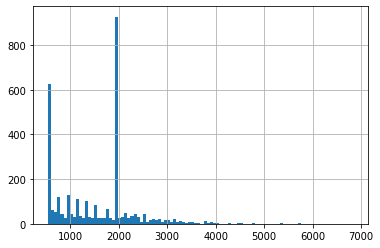

In [38]:
report['summa'].hist(bins = 100)

#### 1 Гипотеза: Средняя выручка пользователей тарифов "Смарт" и "Ультра" равны (Н0).
Альтернативная: Средняя выручка пользователей тарифов "Смарт" и "Ультра" не равны (Н1).

Для оценки распределения выручки по тариффам используем метод st.ttest_ind(), поскольку выборка в обоих случаях больше 50, и выборки не пересекаются между собой, поскольку изначально в данной базе было 500 непересекающихся клиентов. 

In [39]:
alpha = .05
results1 = st.ttest_ind(report_ultra['summa'], report_smart['summa'], equal_var = False)
print('р-значение', results1.pvalue)
if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    

print('Всего получено за год по тарифу "Смарт", руб:', report.query('tariff_name == "smart"')['summa'].sum())
print('Всего получено за год по тарифу "Ультра", руб:', report.query('tariff_name == "ultra"')['summa'].sum())
print('Абонентская плата за год, руб:', report['rub_monthly_fee'].sum())
print('Всего за год, руб:', report['summa'].sum())
print('Всего получено за месяц на клиента по тарифу "Смарт", руб:', report.query('tariff_name == "smart"')['summa'].mean())
print('из них сверх абонентской платы', report.query('tariff_name == "smart"')['summa'].mean() - 550)
print('Всего получено за месяц на клиента по тарифу "Ультра", руб:', report.query('tariff_name == "ultra"')['summa'].mean())
print('из них сверх абонентской платы', report.query('tariff_name == "ultra"')['summa'].mean() - 1950)

р-значение 2.2280145134901475e-238
Отвергаем нулевую гипотезу
Всего получено за год по тарифу "Смарт", руб: 2913740.0
Всего получено за год по тарифу "Ультра", руб: 2041050.0
Абонентская плата за год, руб: 3149200
Всего за год, руб: 4954790.0
Всего получено за месяц на клиента по тарифу "Смарт", руб: 1306.6098654708521
из них сверх абонентской платы 756.6098654708521
Всего получено за месяц на клиента по тарифу "Ультра", руб: 2070.030425963489
из них сверх абонентской платы 120.03042596348905


#### 2 Гипотеза: Средняя выручка пользователей из Москвы не отличается от пользователей других регионов (Н0)
Альтернативная: Средняя выручка пользователей из Москвы отличаются от пользователей других регионов (Н1).

Для оценки распределения выручки по тариффам используем метод st.ttest_ind(), поскольку выборка в обоих случаях больше 50, и выборки не пересекаются между собой, поскольку изначально в данной базе было 500 непересекающихся клиентов.

In [40]:
results2 = st.ttest_ind(report.query('city == "Москва"')['summa'], report.query('city != "Москва"')['summa'], equal_var = False)
print('р-значение', results2.pvalue)
if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение 0.570512062814858
Не получилось отвергнуть нулевую гипотезу


#### 3 Гипотеза: Пользователи уходят с тарифа с одинаковой частотой (Н0)
Альтернативная: Пользователи уходят с тарифов с разной частотой (Н1)

In [41]:
data_users['leave_tariff'] = (data_users['churn_date'] == '2019-12-31')  
results3 = st.ttest_ind(data_users.query('tariff == "smart"')['leave_tariff'], data_users.query('tariff == "ultra"')['leave_tariff'], equal_var = False)
print('р-значение', results3.pvalue)
if (results3.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение 0.21144209958483215
Не получилось отвергнуть нулевую гипотезу


### Выводы
По итогам исследования гипотез:
- Средняя выручка пользователей тарифов "Смарт" и "Ультра" не равны между собой. Учитывая базовую стоимость тарифа "Ультра" можно сделать предположение, что средняя выручка с пользователя тарифа "Ультра" больше, чем с тарифа "Смарт".
- Нельзя уверенно утвверждать, что есть разница в выручке между пользователями тарифов из Москвы и из других городов. p-value  по гипотезе равенства выручки составило 0.52. Но выборка по клиентам показывает, что всего на 500 клиентов приходится 99 жителей Москвы. Что не может не влиять на результат.

## Вывод
Среди предложенных 500 клиентов, 351 являются пользователями тарифа "Смарт", а 149 - пользователями тарифа "Ультра". Но за интересующий период (2018год) часть этой выборки определенное время не являлась пользователями нужных тарифов - это уменьшило количество данных для сравнения.
В выгруженных данных нет критичных пропусков. 
Все даты во всех выгруженных файлах идут в формате 'object', что затрудняет работу с ними.

За 2018 год все клиенты за период пользования интересующих тарифов принесли выручку в размере 4 916 951р. В данную сумму включена и базовая стоимость тарифов (3 149 200р), и оплата за использование сверх тарифа минут, сообщения, гигабайт.

Клиенты тарифа "Ультра" делают в среднем за месяц:
- 58 звонков (стандартное отклонение (std) = 8.9)
- общая длительность этих звонков - 495.6 мин (std = 73.7)
- отправляют сообщений - 44 (std = 11.7)
- используют 19 Gb интернета (std = 2.8)


Клиенты тарифа "Смарт" делают в среднем за месяц:
- совершают 44 звонка (std = 7.9)
- общая длительность этих звонков - 386.6 мин (std = 69)
- отправляют сообщений - 31 (std = 4.9)
- используют 14.7 Gb интернета (std = 2.5)


Пользователи тарифа "Ультра" в основном не используют половину доступных минут (75% клиентов использует до 545 минут из 3000), сообщений (75% клиентов используют 51 сообщение из 1000 доступных), не израсходуют свой трафик (26.2 Gb из 30)


Пользователи тарифа "Смарт" исползуют обльшую часть предоставленных минут, сообщений и Gb. При этом большей части клиентов не хватает доступного трафика  (медиана использованных Gb  - 16.12, а 75% - 19.57 Gb).


##### Рекомендации отделу маркетинга: стоит больше уделить внимания тарифу "Смарт" 
За год больше денег принесли пользователи тарифа "Смарт". Этот тариф приносит больше дохода за счет дополнительных gb трафика сверх тарифа, которые оплачивают пользователи. Это позволяет перекрыть разницу в абонентской плате по тарифу. Пользователи тарифа "Смарт" платят сверх тарифа в среднем 756 руб., а пользователи тарифа "Ультра" - 120 руб.
Средняя выручка пользователей тарифов "Смарт" и "Ультра" не равны между собой. Учитывая базовую стоимость тарифа "Ультра" можно сделать предположение, что средняя выручка с пользователя тарифа "Ультра" больше, чем с тарифа "Смарт". Но, самих пользователей тарифа "Ультра" в данной выборке меньше, чем пользователей тарифа "Смарт". В итоге за год тариф "Смарт" принес больше денег (2 875 901р), чем тариф "Ультра" (2 041 050р). В тоже время за год с тарифа "Смарт" ушло 23 человека (6.5%), в то время как с "Ультра" ушло 15 человек (10%), но не получилось отвергнуть гипотезу о случайном получении таких различий.

##### Рекомендации отделу маркетинга: нет оснований разделять рекламную компанию по городам.
Нельзя уверенно утвверждать, что есть разница в выручке между пользователями тарифов из Москвы и из других городов. Выборка по клиентам показывает, что всего на 500 клиентов приходится 99 жителей Москвы. Что может влиять на результат. 


##### Рекомендации отделу маркетинга: провести анализ клиентов тарифа "Ультра", возможно,  предложить более подходящий тариф.
У пользователей тарифа "Смарт" нет повода переходить на тариф "Ультра". В среднем за месяц пользователь тарифа "Смарт" тратит 1306 руб/мес, получая при этом достаточное количество минут, сообщений и интернет трафика. При этом все еще тратит меньше, чем пользователи тарифа "Ультра", которые используют больше минут и сообщение, но среднее их использование укладывается в границы тарифа "Смарт", а доплачивают только за интернет трафик. 
В тоже время почти половин пользователей тарифа "Ультра" может перейти на тариф "Смарт" и не переплачивать: 119 человек, из них 105 смогут вписаться в лимит тарифа "Смарт" и платить на 1 400р меньше. Такая упущенная выгода приведет к тому, что клиент может отказаться от тарифа самостоятельно и уйти к конкурентам, где более внимательно отнесутся к его финансам. 